ERROR: Error in view(cancerdata.txt): could not find function "view"


In [41]:
install.packages("Seurat") 
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()
BiocManager::install(c("scater"))

library(Seurat)
library(scater)

In [59]:
df <- read.table("cancerdata.txt", sep="\t", header=T, row.names=1, skip=6)


Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”


In [60]:
#df <- read.table("cancerdata.txt", sep="\t", header=T, row.names=1, skip=6)
elim <- which(rowSums(df)==0)
df <- df[-c(elim) ] #got rid of full 0 rows
head(df)
#seurat <- CreateSeuratObject(counts=df)

,X0,X0.1,X0.42761,X0.2,X0.3,X0.4,X0.5,X0.6,X0.7,X0.8,⋯,X0.5830,X0.5831,X0.5832,X0.5833,X0.5834,X0.5835,X0.5836,X0.5837,X0.5838,X0.5839
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPS11,6.0037,7.3006,7.2885,0.0000,7.47420,6.9548,5.9743,6.46500,6.5628,7.9486,⋯,6.8747,5.96490,4.8252,7.5167,7.3249,5.3595,7.4281,6.8439,6.8676,6.3146
ELMO2,0.0000,0.0000,0.0000,5.2465,0.50487,0.0000,0.0000,3.41540,0.0000,1.9613,⋯,0.0000,0.62106,0.0000,0.0000,0.0000,0.0000,0.0000,3.2863,0.0000,3.5905
CREB3L1,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.00000,0.0000,0.0000,⋯,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PNMA1,5.1474,5.3329,2.8337,5.7507,0.19661,1.9949,0.0000,2.15410,3.5815,0.0000,⋯,3.0332,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.3462,0.0000
MMP2,0.0000,0.0000,0.0000,0.0000,0.36065,0.0000,0.0000,0.00000,0.0000,0.0000,⋯,0.0000,0.00000,0.0000,0.0000,0.0000,4.5537,0.0000,0.0000,0.0000,0.0000
TMEM216,0.0000,0.0000,3.6040,4.9978,0.00000,0.0000,0.0000,0.86869,0.0000,4.3096,⋯,0.0000,2.99780,0.0000,0.0000,3.5259,0.0000,4.8608,0.0000,4.4569,0.0000


In [63]:
seuratdf <- CreateSeuratObject(counts = df, project = "HNSCC", min.cells = 3, min.features = 200)
seuratdf
#add new columns to metadata


An object of class Seurat 
1173 features across 87 samples within 1 assay 
Active assay: RNA (1173 features, 0 variable features)

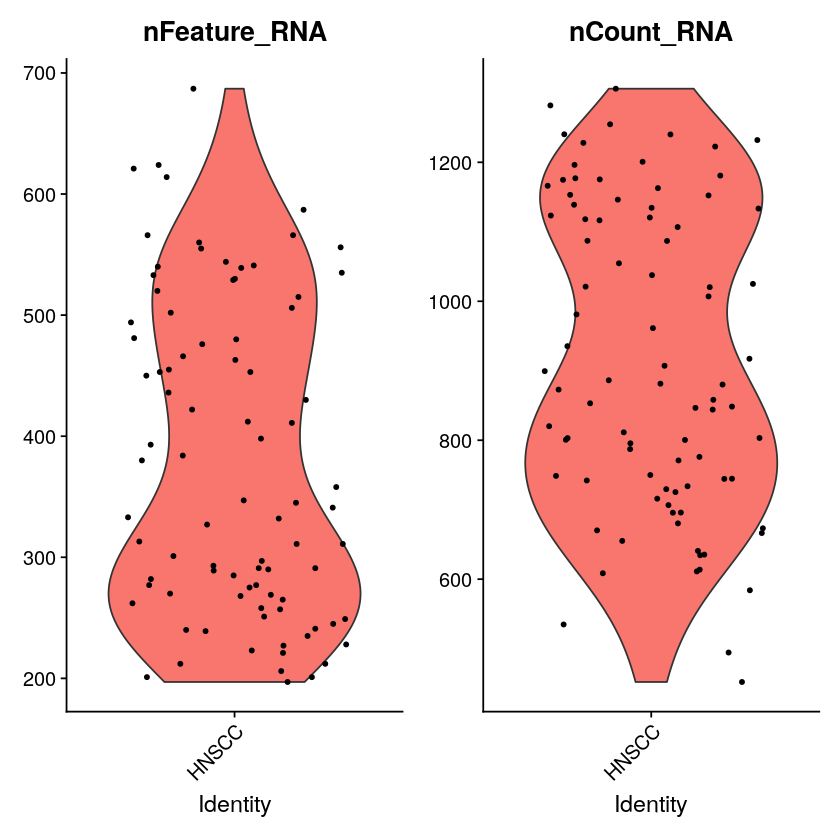

In [64]:
#visualize QC metrics, and use these to filter cellsze 
VlnPlot(seuratdf, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2)


#normalize data
seuratdf <- NormalizeData(seuratdf)


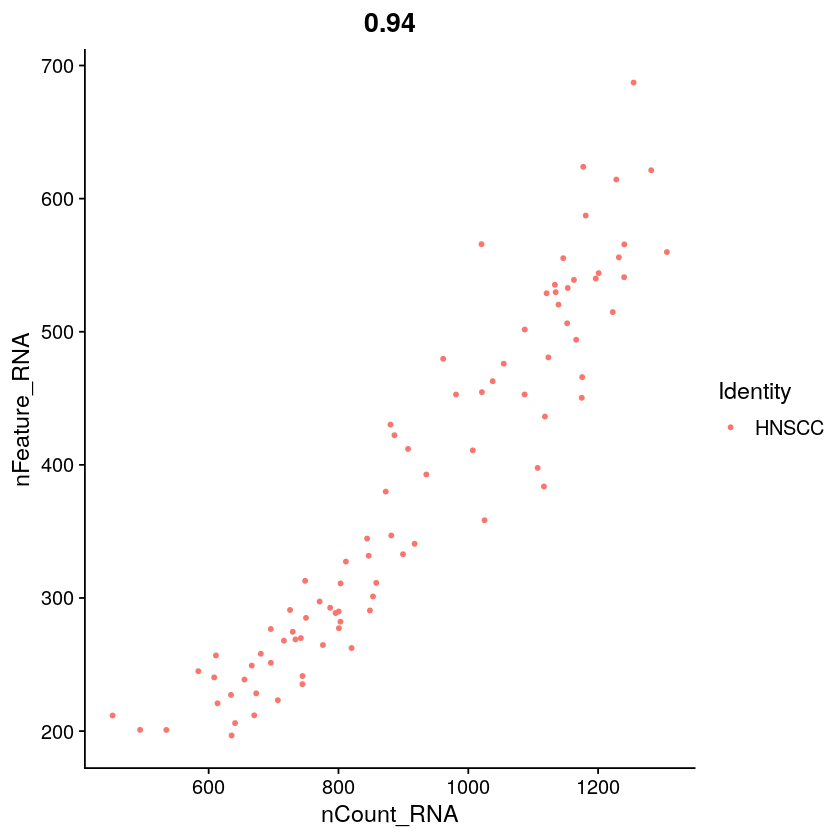

In [67]:
seuratdf <- FindVariableFeatures(seuratdf, selection.method = "vst", nfeatures = 2000)
top10 <- head(VariableFeatures(seuratdf), 10)
#ten most highly variable genes
plot2 <- FeatureScatter(seuratdf, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot2

In [71]:
# plot variable features with and without labels
all.genes <- rownames(seuratdf)
seuratdf <- ScaleData(seuratdf, features = all.genes)



Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  HLA-C, HNRNPH1, EIF1, MTRNR2L6, B2M, METTL21A, C4B, ASTN2, ARGFX, CHST6 
	   GGT5, FBLIM1, FHL1, COL18A1, CA5B, MYLK3, HSPB6, MRVI1, ZNF865, MFGE8 
	   LRTOMT, EGR1, ZFP36L1, SLC24A4, LOC100506190, RGS16, RBPMS, CYR61, SERPINF1, MAP1LC3C 
Negative:  DSP, PKP3, TACSTD2, KRT15, FKBP4, LSG1, UNG, SQLE, BRIX1, ABCC5 
	   GRB7, EFTUD2, INPP5B, RNF43, MED21, MRPL12, ARHGAP8, EHMT2, AP2S1, SHMT2 
	   HDAC1, LEPRE1, RCN2, TOMM40, C20orf24, TOMM22, KRTCAP3, MRPL4, CHRM3, MED10 
PC_ 2 
Positive:  FAM83A, IGFL1, SNX8, CHURC1, MALL, ARAP1, PTGFRN, APBB2, MAN2B2, COL4A6 
	   PFKFB2, SLC5A10, SRPX, NDRG1, KLC2, PTP4A2, RNASE4, CAV2, RELL2, RAPH1 
	   NDUFS4, UBE2H, ROR2, TMED7, SLC25A1, ITSN1, MAP7D1, C6orf141, TOX2, MTPN 
Negative:  PIR, ASTN2, ARHGAP8, CHRM3, RNF43, DUSP2, CBX2, PARD6B, HLA-

In [74]:
#scaling data
all.genes <- rownames(seuratdf)
seuratdf <- ScaleData(seuratdf, features = all.genes)
#running PCA
seuratdf <- RunPCA(seuratdf, features = VariableFeatures(object = seuratdf))
DimPlot(seuratdf, reduction = "pca")



Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  HLA-C, HNRNPH1, EIF1, MTRNR2L6, B2M, METTL21A, C4B, ASTN2, ARGFX, CHST6 
	   GGT5, FBLIM1, FHL1, COL18A1, CA5B, MYLK3, HSPB6, MRVI1, ZNF865, MFGE8 
	   LRTOMT, EGR1, ZFP36L1, SLC24A4, LOC100506190, RGS16, RBPMS, CYR61, SERPINF1, MAP1LC3C 
Negative:  DSP, PKP3, TACSTD2, KRT15, FKBP4, LSG1, UNG, SQLE, BRIX1, ABCC5 
	   GRB7, EFTUD2, INPP5B, RNF43, MED21, MRPL12, ARHGAP8, EHMT2, AP2S1, SHMT2 
	   HDAC1, LEPRE1, RCN2, TOMM40, C20orf24, TOMM22, KRTCAP3, MRPL4, CHRM3, MED10 
PC_ 2 
Positive:  FAM83A, IGFL1, SNX8, CHURC1, MALL, ARAP1, PTGFRN, APBB2, MAN2B2, COL4A6 
	   PFKFB2, SLC5A10, SRPX, NDRG1, KLC2, PTP4A2, RNASE4, CAV2, RELL2, RAPH1 
	   NDUFS4, UBE2H, ROR2, TMED7, SLC25A1, ITSN1, MAP7D1, C6orf141, TOX2, MTPN 
Negative:  PIR, ASTN2, ARHGAP8, CHRM3, RNF43, DUSP2, CBX2, PARD6B, HLA-

An object of class Seurat 
1 features across 87 samples within 1 assay 
Active assay: RNA (1 features, 1 variable features)
 1 dimensional reduction calculated: pca

In [78]:
#determine dimensionality of the dataset
jackstraw <- JackStraw(seuratdf, num.replicate = 100)
scorejackstraw<- ScoreJackStraw(jackstraw, dims = 1:20)
#JackStrawPlot(scorejackstraw, dims = 1:15)
seuratdf <- scorejackstraw

In [79]:
#clustering 
seuratdf <- FindNeighbors(seuratdf, dims = 1:10)
seuratdf <- FindClusters(seuratdf, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 87
Number of edges: 2145

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6957
Number of communities: 2
Elapsed time: 0 seconds


20:20:00 UMAP embedding parameters a = 0.9922 b = 1.112

20:20:00 Read 87 rows and found 10 numeric columns

20:20:00 Using Annoy for neighbor search, n_neighbors = 30

20:20:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

20:20:00 Writing NN index file to temp file /tmp/RtmpVik05c/file5b8e784060e8

20:20:00 Searching Annoy index using 1 thread, search_k = 3000

20:20:00 Annoy recall = 100%

20:20:00 Commencing smooth kNN distance calibration using 1 thread

20:20:01 Initializing from normalized Laplacian + noise

20:20:01 Commencing optimization for 500 epochs, with 2916 positive edges

20:20:02 Optimization finished



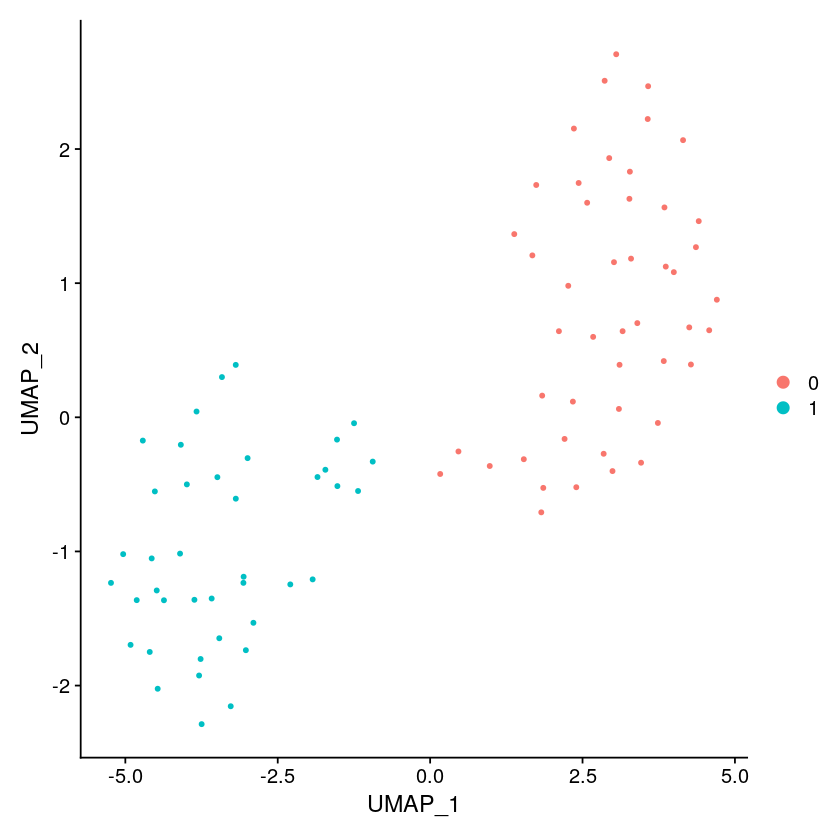

In [81]:
#running umap and plotting
seuratdf <- RunUMAP(seuratdf, dims = 1:10)
DimPlot(seuratdf, reduction = "umap")


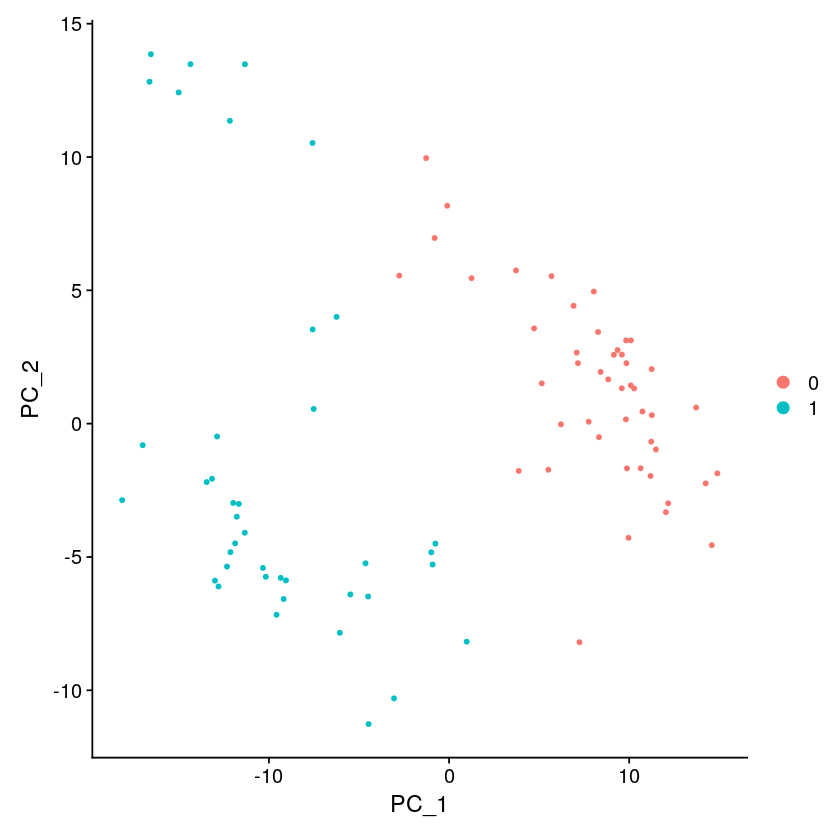